In [1]:
# Dependencies for this notebook can be found in requirements_pycaret.txt

# Install dependencies using pip3 install -r requirements_pycaret.txt

# Installation instructions

# virtualenv venv_pycaret
# source venv_pycaret/bin/activate
# ipython kernel install --user --name=venv_pycaret
# Start the notebook using `python3 -m jupyter notebook`
# In the notebook click on Kernel -> Change kernel -> venv_pycaret
# Execute this notebook

# Uncomment these lines if not using a kernal specifically for pycaret


# import sys
# print(sys.executable) 

# ! /usr/local/opt/python@3.9/bin/python3.9 -m pip install pycaret

In [12]:
import pycaret
import pandas as pd

In [13]:
df = pd.read_csv('data/UNSW_NB15_training-set.csv')

In [14]:
df_test = pd.read_csv('data/UNSW_NB15_testing-set.csv')

In [15]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [16]:
##### PYCARET #####

## This section is memory intensive, if you want to run this section on a smaller subset then run the following

## You can take a smaller sample by running pycaret_df = pycaret_df.sample(50000)

df = df.sample(50000)

In [17]:
df = df.drop(['attack_cat', 'id'], axis=1, errors='ignore')

In [18]:
df_test = df_test.drop(['attack_cat', 'id'], axis=1, errors='ignore')

In [19]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
50817,0.000001,udp,dns,INT,2,0,114,0,1.000000e+06,254,...,3,3,3,0,0,0,3,3,0,1
12742,0.000010,udp,dns,INT,2,0,114,0,1.000000e+05,254,...,12,12,12,0,0,0,12,12,0,1
54611,0.000005,udp,dns,INT,2,0,114,0,2.000000e+05,254,...,7,4,7,0,0,0,7,17,0,1
66902,0.000009,udp,-,INT,2,0,104,0,1.111111e+05,254,...,1,1,2,0,0,0,1,3,0,0
57368,0.000008,udp,dns,INT,2,0,114,0,1.250000e+05,254,...,2,2,2,0,0,0,2,12,0,1


In [20]:
from pycaret.classification import *
s = setup(df, target = 'label', session_id = 123)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(50000, 43)"
4,Transformed data shape,"(50000, 59)"
5,Transformed train set shape,"(35000, 59)"
6,Transformed test set shape,"(15000, 59)"
7,Numeric features,39
8,Categorical features,3
9,Preprocess,True


In [21]:
# model training and selection
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8868,0.0000,0.8990,0.8952,0.8971,0.7714,0.7715,0.3130
lda,Linear Discriminant Analysis,0.8867,0.9633,0.8986,0.8953,0.8969,0.7711,0.7711,0.5030
et,Extra Trees Classifier,0.8587,0.9694,0.7818,0.9526,0.8583,0.7203,0.7348,0.6350
qda,Quadratic Discriminant Analysis,0.8356,0.9487,0.7178,0.9771,0.8268,0.6775,0.7076,0.3820
dt,Decision Tree Classifier,0.8007,0.8115,0.7013,0.9159,0.7941,0.6076,0.6282,0.2980
knn,K Neighbors Classifier,0.8003,0.9033,0.8083,0.8244,0.8162,0.5976,0.5978,0.5430
rf,Random Forest Classifier,0.7774,0.9617,0.6612,0.9082,0.7652,0.5634,0.5892,0.8000
lightgbm,Light Gradient Boosting Machine,0.7723,0.8180,0.6606,0.8975,0.7610,0.5531,0.5769,0.3940
ada,Ada Boost Classifier,0.7627,0.8872,0.6606,0.8782,0.7537,0.5332,0.5539,0.7430
lr,Logistic Regression,0.7533,0.8132,0.6581,0.8594,0.7453,0.5141,0.5315,0.9800


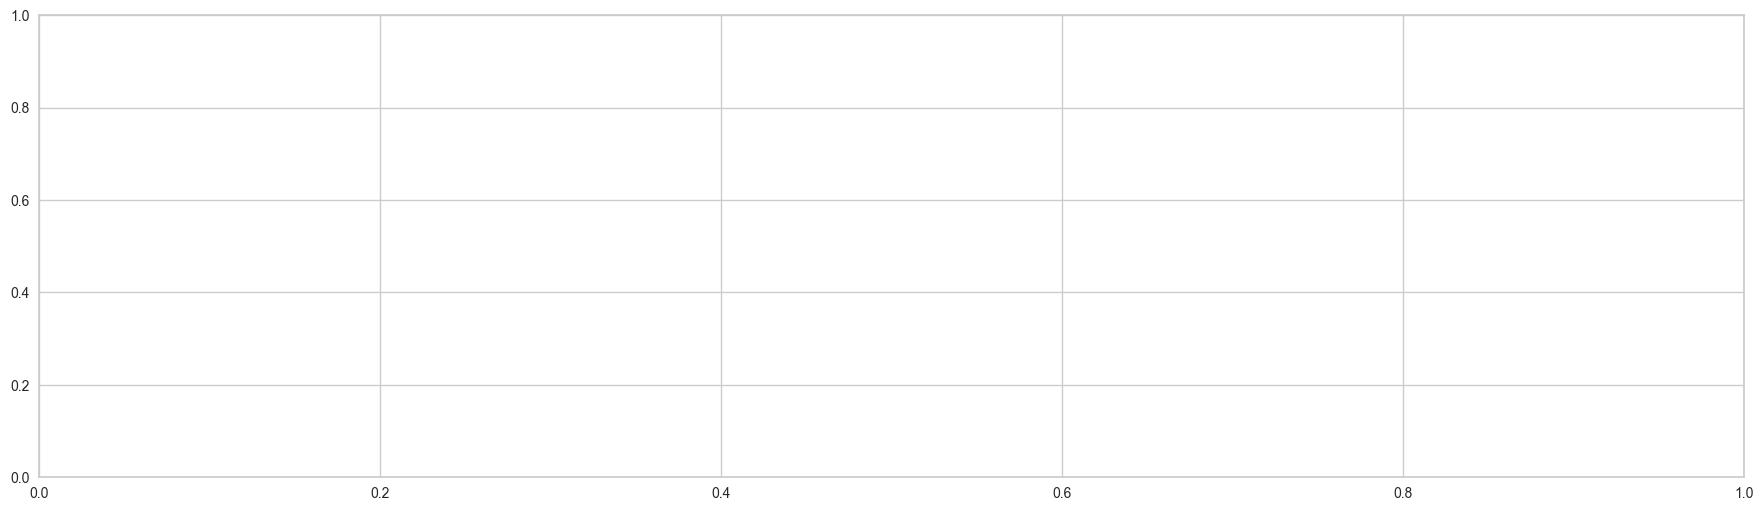

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [23]:
# evaluate trained model
evaluate_model(best)

In [16]:
# train a Neural Network model
nn = create_model('mlp')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6491,0.6502,0.6376,0.6985,0.6667,0.2980,0.2993
1,0.7303,0.7051,0.9569,0.6816,0.7961,0.4293,0.4865
2,0.7566,0.7524,0.7861,0.7748,0.7804,0.5074,0.5074
3,0.4283,0.4485,0.2435,0.4630,0.3192,-0.0970,-0.1120
4,0.7460,0.7564,0.6547,0.8492,0.7394,0.4996,0.5158
5,0.7503,0.7609,0.6547,0.8578,0.7426,0.5085,0.5261
6,0.7554,0.7654,0.6604,0.8630,0.7482,0.5185,0.5361
7,0.7551,0.7618,0.6952,0.8322,0.7576,0.5142,0.5227
8,0.4380,0.4999,0.2930,0.4821,0.3645,-0.0879,-0.0968


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:

# evaluate model performance
evaluate_model(nn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…